In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("loan_data.csv")
df.shape

(381, 13)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(308, 13)

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

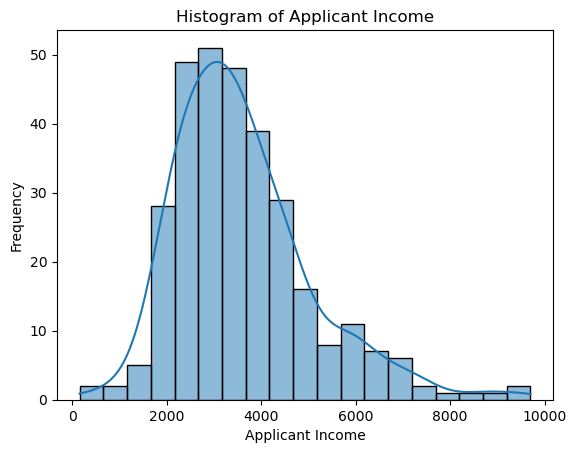

In [13]:
sns.histplot(df["ApplicantIncome"],kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

In [14]:
(df["ApplicantIncome"]>=3000).sum()

193

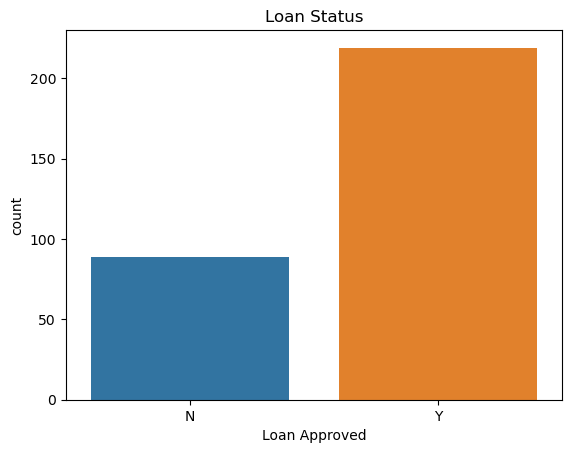

In [15]:
sns.countplot(x="Loan_Status",data=df)
plt.title("Loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("count")
plt.show()

In [16]:
(df["Loan_Status"]=='Y').sum() #loan approved to 219
(df["Loan_Status"]=='N').sum() #loan not approved to 89

89

In [17]:
avg_loan_amount_by_Education = df.groupby("Education")["LoanAmount"].mean().reset_index()
avg_loan_amount_by_Education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


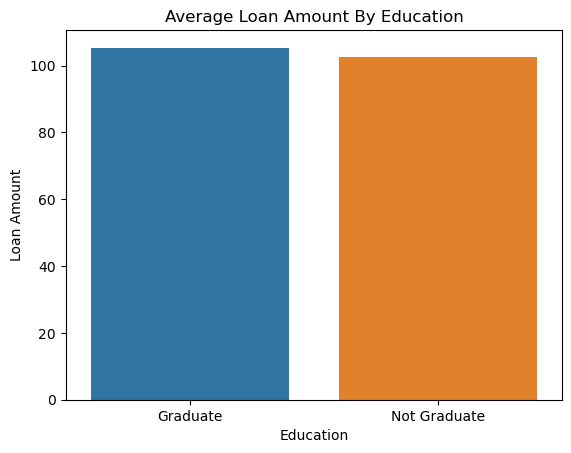

In [18]:
sns.barplot(x="Education",y="LoanAmount",data=avg_loan_amount_by_Education)
plt.title("Average Loan Amount By Education")
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.show()

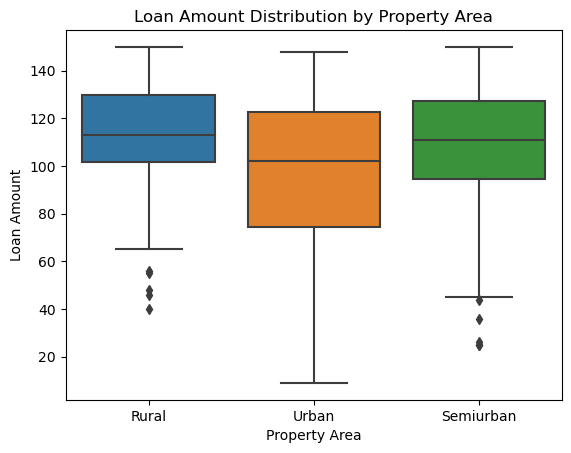

In [19]:
sns.boxplot(x="Property_Area",y="LoanAmount",data=df)
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

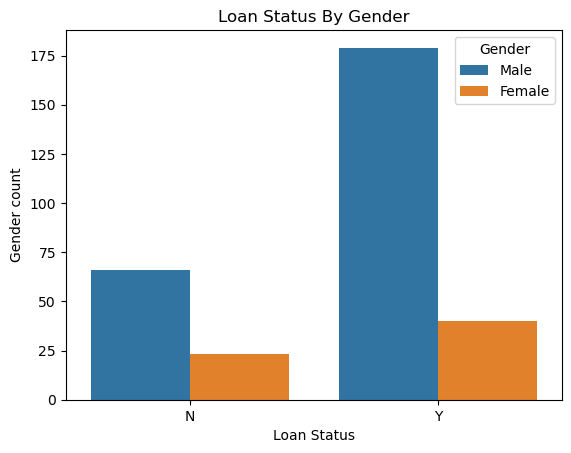

In [20]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)
plt.title("Loan Status By Gender")
plt.xlabel("Loan Status")
plt.ylabel("Gender count")
plt.show()

In [21]:
df["Gender"].value_counts()

Male      245
Female     63
Name: Gender, dtype: int64

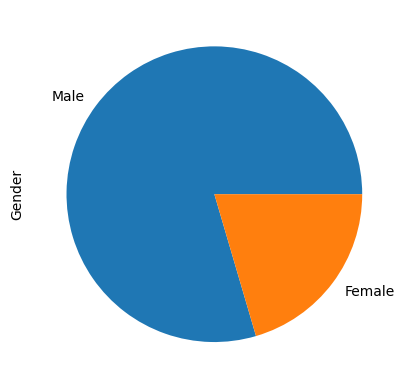

In [22]:
df["Gender"].value_counts().plot(kind="pie")
plt.show()

In [23]:
((df["Gender"]=="Male")&(df["Loan_Status"]=='Y')).sum() #gender is male and loan approved -> 179
((df["Gender"]=="Female")&(df["Loan_Status"]=='Y')).sum() #gender is female and loan approved -> 40
((df["Gender"]=="Male")&(df["Loan_Status"]=='N')).sum() #gender is male and loan not approved -> 66
((df["Gender"]=="Female")&(df["Loan_Status"]=='N')).sum() #gender is female and loan not approved -> 23

23

In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
loan_status_by_married = df.groupby("Married")["Loan_Status"].value_counts().unstack()

In [26]:
loan_status_by_married

Loan_Status,N,Y
Married,,
No,44,79
Yes,45,140


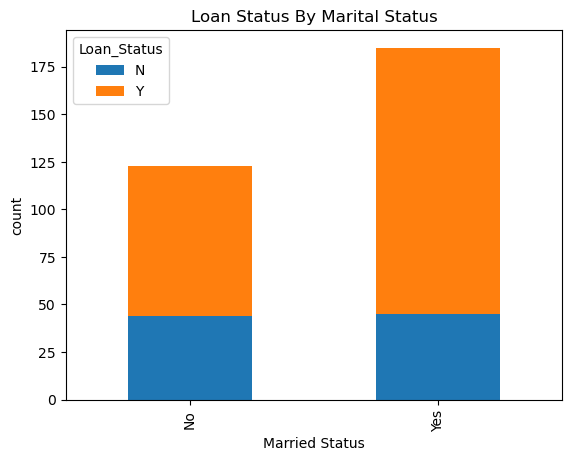

In [27]:
loan_status_by_married.plot(kind="bar",stacked=True)
plt.title("Loan Status By Marital Status")
plt.xlabel("Married Status")
plt.ylabel("count")
#plt.xticks(rotation=0)
plt.show()

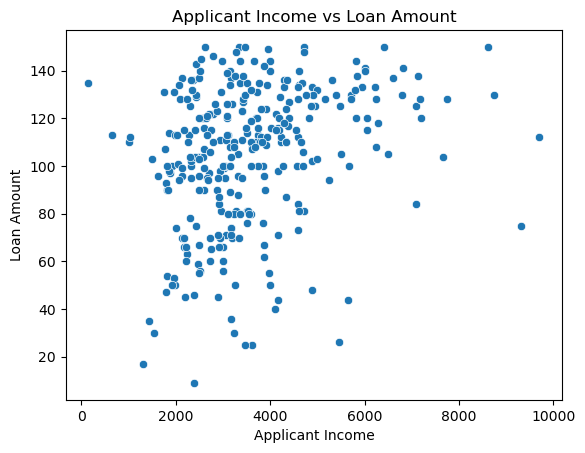

In [28]:
sns.scatterplot(x="ApplicantIncome",y="LoanAmount",data=df)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [29]:
numeric_data=df.select_dtypes(include=['int64','Float64'])
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [30]:
correlation_matrix=numeric_data.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


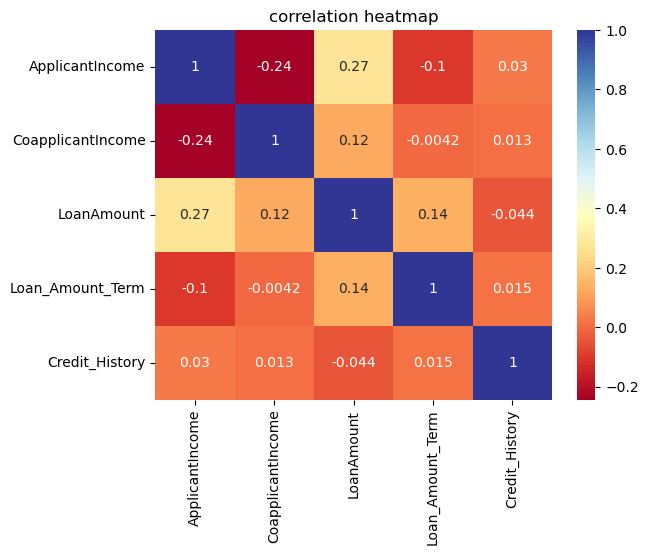

In [31]:
sns.heatmap(correlation_matrix,annot=True,cmap='RdYlBu')
plt.title("correlation heatmap")
plt.show()

In [32]:
avg_loan_term_by_employee = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()
avg_loan_term_by_employee

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


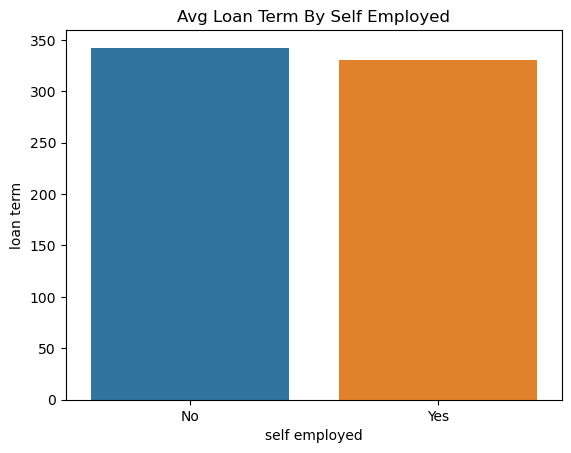

In [33]:
sns.barplot(x="Self_Employed",y="Loan_Amount_Term",data=avg_loan_term_by_employee)
plt.title("Avg Loan Term By Self Employed")
plt.xlabel("self employed")
plt.ylabel("loan term")
plt.show()

In [34]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [35]:
#Gender column is unbalanced here , since female count is less 
#dependents is not so imp 
#self employed is not taken here
#coApplicant income is not so imp here
#loan-amount-term is less correlated with other features
#property-area is not considering

#Married column is playing some role i.e Married person getting loan chances are highly correlated
#Education column is balanced correlated 
#Applicant income is ofcourse imp
#loan Amount is neccesary
#credit history is considered

In [36]:
x=df[["Married","Education","ApplicantIncome","LoanAmount","Credit_History"]]

In [37]:
x.head()

,Married,Education,ApplicantIncome,LoanAmount,Credit_History
0,Yes,Graduate,4583,128.0,1.0
1,Yes,Graduate,3000,66.0,1.0
2,Yes,Not Graduate,2583,120.0,1.0
3,No,Graduate,6000,141.0,1.0
4,Yes,Not Graduate,2333,95.0,1.0


In [38]:
y=df[["Loan_Status"]]
y.head()

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y


In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y["Loan_Status"]=encoder.fit_transform(y)
y

c:\Users\Suresh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Suresh\AppData\Local\Temp\ipykernel_12356\2153155884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Loan_Status"]=encoder.fit_transform(y)


,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [40]:
encoder.classes_   # 0 is N & 1 is Y

array(['N', 'Y'], dtype=object)

In [41]:
x["Married"]=encoder.fit_transform(x["Married"])

C:\Users\Suresh\AppData\Local\Temp\ipykernel_12356\2658779370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Married"]=encoder.fit_transform(x["Married"])


In [42]:
encoder.classes_  # 0 is No & 1 is Yes

array(['No', 'Yes'], dtype=object)

In [43]:
x

,Married,Education,ApplicantIncome,LoanAmount,Credit_History
0,1,Graduate,4583,128.0,1.0
1,1,Graduate,3000,66.0,1.0
2,1,Not Graduate,2583,120.0,1.0
3,0,Graduate,6000,141.0,1.0
4,1,Not Graduate,2333,95.0,1.0
...,...,...,...,...,...
376,1,Graduate,5703,128.0,1.0
377,1,Graduate,3232,108.0,1.0
378,0,Graduate,2900,71.0,1.0
379,1,Graduate,4106,40.0,1.0


In [44]:
x["Education"]=encoder.fit_transform(x["Education"])

C:\Users\Suresh\AppData\Local\Temp\ipykernel_12356\124779851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Education"]=encoder.fit_transform(x["Education"])


In [45]:
encoder.classes_  # 0 is Graduate & 1 is Not Graduate

array(['Graduate', 'Not Graduate'], dtype=object)

In [46]:
x.head()

,Married,Education,ApplicantIncome,LoanAmount,Credit_History
0,1,0,4583,128.0,1.0
1,1,0,3000,66.0,1.0
2,1,1,2583,120.0,1.0
3,0,0,6000,141.0,1.0
4,1,1,2333,95.0,1.0


The textual(Categorical) data is converted to Numerical data.
But here the range of values in different columns is different i.e 
ApplicantIncome values are high range(1000s) whereas others are just 0s and 1s
so this column may dominate the other columns, to avoid that we need to scale all the column values.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
x=scaler.fit_transform(x)

In [49]:
x

array([[ 0.81539246, -0.58734842,  0.67389339,  0.79689813,  0.41364557],
       [ 0.81539246, -0.58734842, -0.41036528, -1.31665281,  0.41364557],
       [ 0.81539246,  1.70256694, -0.6959849 ,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.58734842, -0.47885919, -1.14620515,  0.41364557],
       [ 0.81539246, -0.58734842,  0.34717742, -2.20298062,  0.41364557],
       [-1.22640329, -0.58734842,  0.67389339,  0.96734579, -2.41752858]])

To save this StandardScaler method use joblib and save model as pkl file
Reason: Whenever the model is given with unseen data , first the data should be scaled since we scaled
the trained data , for that purpose we need to use same StandardScaler() used for our training data.
For that reason we need to save our Scaler().

In [50]:
import joblib
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [52]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print("Accuracy score of the model is {}".format(accuracy_score(y_test,predictions)*100))

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [55]:
logistic_model_predictions = logistic_model.predict(X_test)
logistic_model_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [56]:
modelperformance(logistic_model_predictions)

Accuracy score of the model is 87.09677419354838


In [57]:
from sklearn.neighbors import KNeighborsClassifier
param_grid={"n_neighbors":[3,4,5,6,7,8],"weights":["uniform","distance"]}
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid)
gridkn.fit(X_train,y_train.values.ravel())


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']})

In [58]:
gridkn.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [59]:
knc_predictions = gridkn.predict(X_test)

In [60]:
modelperformance(knc_predictions)

Accuracy score of the model is 80.64516129032258


In [61]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svc={"C":[0.001,0.04,0.01,0.1,0.5],"kernel":["linear","rbf","poly"]}

In [62]:
gridsvc=GridSearchCV(svm,param_grid_svc)
gridsvc.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.04, 0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [63]:
gridsvc.best_params_

{'C': 0.04, 'kernel': 'linear'}

In [64]:
svm_predictions = gridsvc.predict(X_test)

In [65]:
modelperformance(svm_predictions)

Accuracy score of the model is 87.09677419354838


Accuracy of SVM ---> 87.09677419354838

Accuracy of Logistic Regression ---> 87.09677419354838

Accuracy of KNN model ---> 80.64516129032258


In [66]:
joblib.dump(gridsvc,"model.pkl")

['model.pkl']